In [1]:
import os
os.chdir(path='../')
import scanpy as sc
import STForte.helper as stfhelper
import plotly.express as px
trial_name = "trial-mouse_brain_coronal_Xenium"
sc.set_figure_params(dpi=120)

/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/pytorch_lightning/utilities/seed.py:47: LightningDeprecationWarning: `pytorch_lightning.utilities.seed.seed_everything` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.seed.seed_everything` instead.
  rank_zero_deprecation(
Global seed set to 0


In [2]:
adata = sc.read_h5ad(f"./{trial_name}/outputs/stforte.h5ad")
adata

AnnData object with n_obs × n_vars = 130557 × 248
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts', 'STForte_Mask'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'log1p'
    obsm: 'STForte_ATTR', 'STForte_COMB', 'STForte_TOPO', 'spatial'
    layers: 'count'

In [3]:
sc.pp.neighbors(adata, use_rep='STForte_COMB')
sc.tl.leiden(adata, resolution=0.85)
sc.tl.umap(adata)

/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


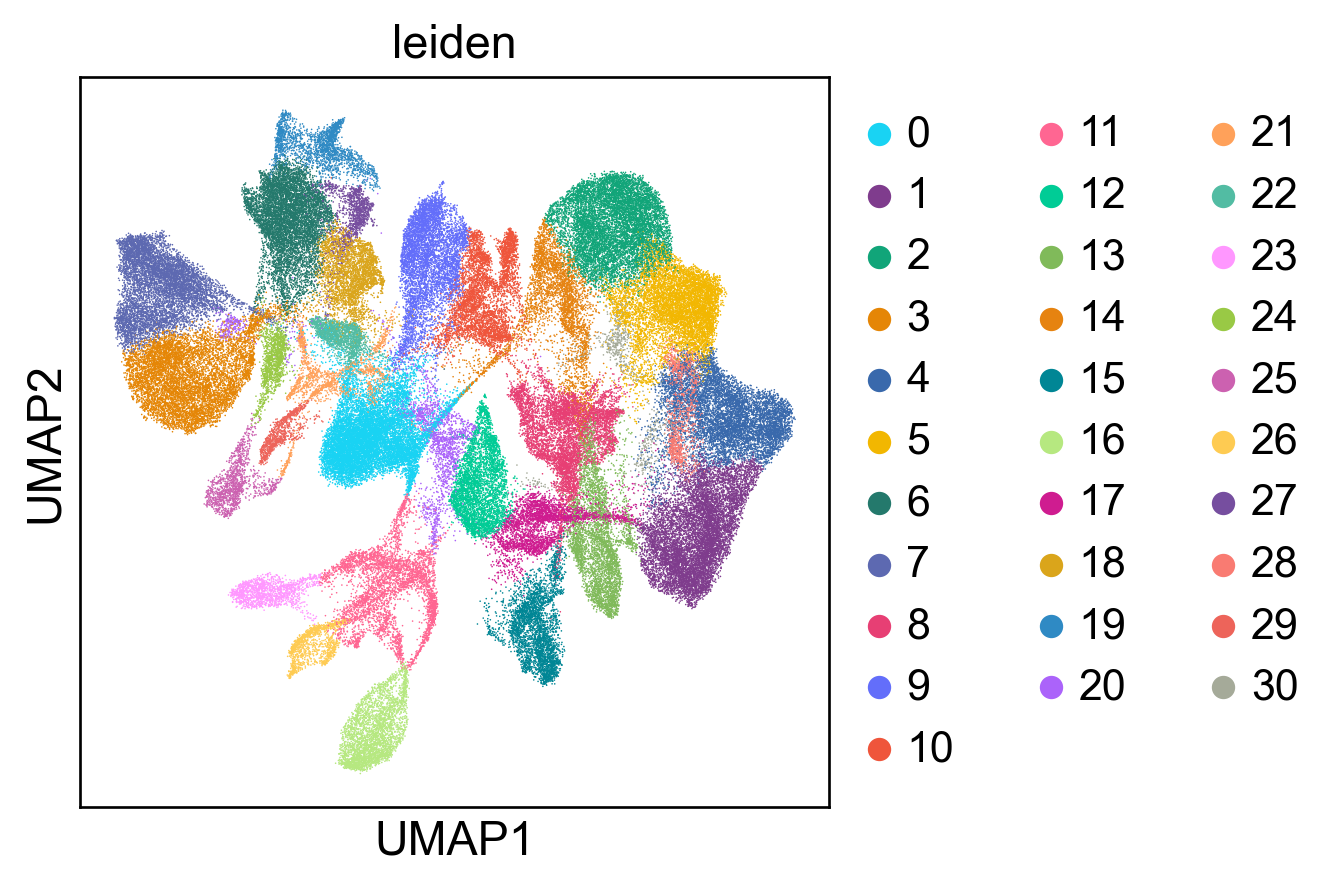

In [4]:
color_curated = dict(zip(["1", "2", "4", "5", "8", "13", "14", "15", "17", "28", "30",
 "9", "10", "12", "20", "21", "0", "11", "16", "23", "26",
 "3", "7", "22", "24", "25", "6", "18", "19", "27", "29"
 ], 
stfhelper.pl.rgb2hex(px.colors.qualitative.Bold) + px.colors.qualitative.Plotly +\
    stfhelper.pl.rgb2hex(px.colors.qualitative.Vivid)[:10]))
color_curated = [color_curated[f'{ii}'] for ii in range(len(color_curated))]

sc.pl.umap(adata, color="leiden", palette=color_curated)

/home/poncey/miniconda3/envs/stforte_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


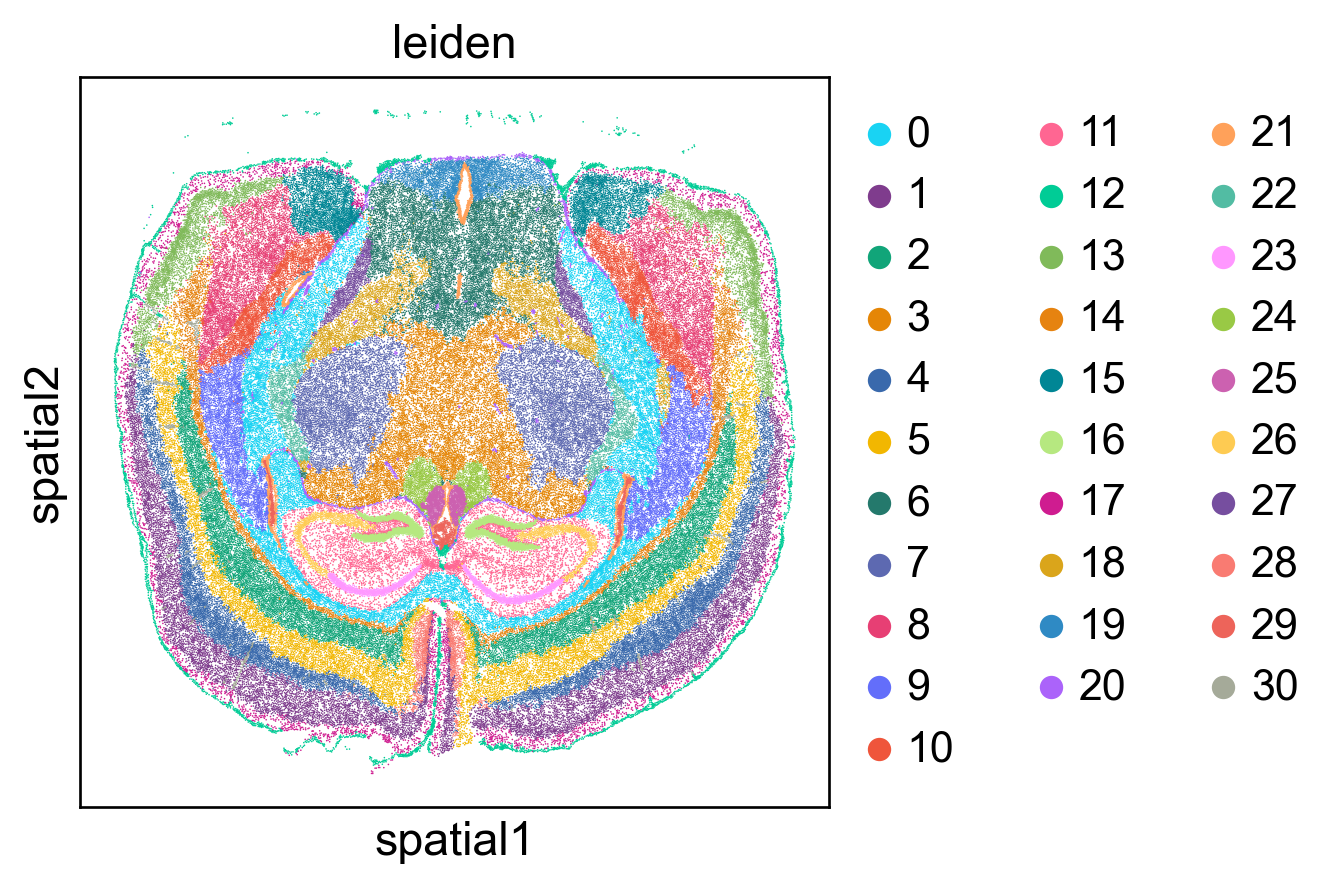

In [5]:
sc.pl.embedding(adata, basis="spatial", color=["leiden"])

In [6]:
label_curated_V1 = {
    "Cerebral cortex": ["1", "2", "4", "5", "8", "13", "14", "15", "17", "28", "30"],
    "Cerebral nuclei": ["9", "10"],
    "Meninges": ["12", "20", "21"],
    "Fiber tracts": ["0"],
    "Hippocampal": ["11", "16", "23", "26"],
    "Thalamus": ["3", "7", "22", "24", "25"],
    "Hypothalamus": ["6", "18", "19", "27"],
    "Ventricular": ["29"],
}
cat_curated_V1 = {v: k for k, vv in label_curated_V1.items() for v in vv}
adata.obs['label_curated'] = adata.obs["leiden"].astype(str).replace(cat_curated_V1).astype('category')

In [7]:
adata.write_h5ad(f"./{trial_name}/outputs/stforte.h5ad")